# Cluster Analysis

In [4]:
# Modules for Cluster Analysis
import pandas as pd
import geopandas as gpd

# Preprossessing
from sklearn import preprocessing

#cluster analysis
from sklearn.cluster import KMeans


In [5]:
# Read files
df_2019 = pd.read_csv('Data/df_2019.csv')
df_2017 = pd.read_csv('Data/df_2017.csv')

In [14]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3273 entries, 0 to 3272
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             3273 non-null   int64  
 1   state                  3273 non-null   int64  
 2   county                 3273 non-null   int64  
 3   tract                  3273 non-null   int64  
 4   neighborhood           3273 non-null   object 
 5   GEOID                  3273 non-null   int64  
 6   geometry               3273 non-null   object 
 7   total pop              3273 non-null   float64
 8   white                  3273 non-null   float64
 9   black                  3273 non-null   float64
 10  native                 3273 non-null   float64
 11  asian                  3273 non-null   float64
 12  hawaiian/pac islander  3273 non-null   float64
 13  other                  3273 non-null   float64
 14  median_hh_income       3273 non-null   float64
 15  vehi

In [16]:
# standardising
cols_to_plot = ['state', 'county', 'tract', 'total pop', 'white', 'black', 'native', 'asian',
       'hawaiian/pac islander', 'other', 'median_hh_income', 'vehicles_avail','OBJECTID', 'STOPID','ACCESSIBILITYMASK', 'SDE_ID', 'SIGNUPID','sf_find_code', 'analysis_neigh_code', 'ESN','year_collected']
# normalizing
scaler = preprocessing.StandardScaler().fit(df_2019[cols_to_plot])

df_to_cluster = pd.DataFrame(scaler.transform(df_2019[cols_to_plot]), 
                         columns=cols_to_plot, index=df_2019.index) 



/Users/chaithra/opt/anaconda3/envs/uds/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/chaithra/opt/anaconda3/envs/uds/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/chaithra/opt/anaconda3/envs/uds/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/chaithra/opt/anaconda3/envs/uds/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicit

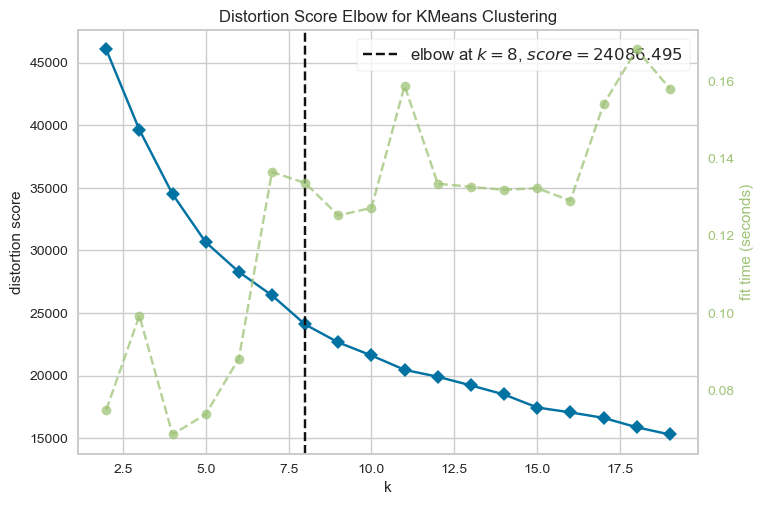

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [28]:
# ideal number of clusters

#install yellowbrick to vizualize the Elbow curve
# !pip install yellowbrick  
# https://www.scikit-yb.org/en/latest/api/cluster/elbow.html

from yellowbrick.cluster import KElbowVisualizer


# Instantiate the clustering model and visualizer
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,20))

# model = KMeans()
# visualizer = KElbowVisualizer(
#     model, k=(2,20), metric='calinski_harabasz', timings=True, locate_elbow=True
# )
 
visualizer.fit(df_to_cluster)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [17]:
# kmeans

# dropping null values
df_to_cluster=df_to_cluster.dropna()

# clustering
kmeans = KMeans(n_clusters=5, random_state=0).fit(df_to_cluster)

# adding cluster ids to the df
df_to_cluster['cluster_id'] = kmeans.labels_

/Users/chaithra/opt/anaconda3/envs/uds/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [18]:
print(df_to_cluster.groupby('cluster_id').size())

cluster_id
0     133
1     423
2    1168
3     884
4     476
dtype: int64


/Users/chaithra/opt/anaconda3/envs/uds/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/chaithra/opt/anaconda3/envs/uds/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/chaithra/opt/anaconda3/envs/uds/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/chaithra/opt/anaconda3/envs/uds/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicit

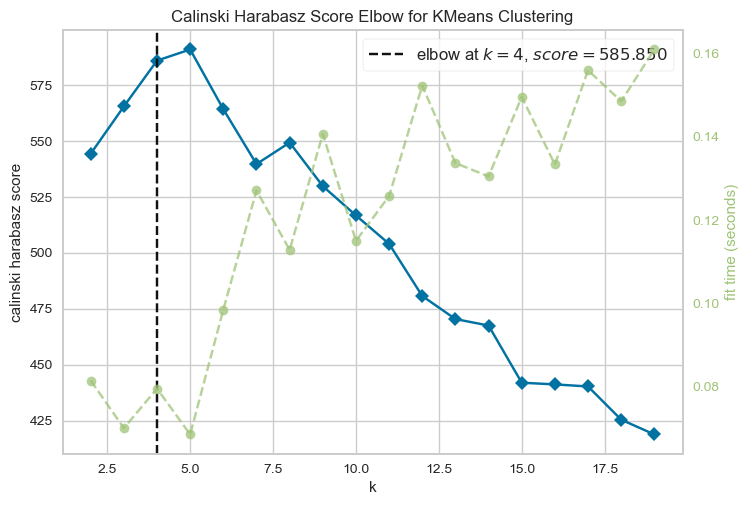

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>